# Email Spam Classifier

## 1. Module import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## 2. Data

In [4]:
# Load dataset

df = pd.read_csv('../data/tfidf_matrix.csv',encoding='latin1')
#df = pd.read_csv('../data/emails.csv')
#df = pd.read_csv('../data/preprocessing.csv')
df.head()


,008704050406,0089,0121,01223585236,01223585334,0125698789,02,0207,02073162414,02085076972,...,ãµ,ãµd,ãµday,ãµllspeak,ãµm,ãµr,ãµscool,ãµt,ãµv,prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
# Define features and target variable
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


### Split data into 2 parts to train and test

In [6]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((4128, 6712), (1032, 6712), (4128,), (1032,))

## 3.Model

### Build model


In [7]:

# Initialize and train the Random Forest classifier
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
RF_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

### Make predict on test data

In [8]:
# Predict the target variable for the test set
y_predict_test = RF_classifier.predict(x_test)

### Result

In [9]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_predict_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       909
           1       0.99      0.81      0.89       123

    accuracy                           0.98      1032
   macro avg       0.98      0.91      0.94      1032
weighted avg       0.98      0.98      0.98      1032



## 4. Final

In [10]:
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
RF_classifier.fit(x_train, y_train)

# Predict the target variable for the test set
y_predict_test = RF_classifier.predict(x_test)

Precision: 0.9900990099009901
Recall: 0.8130081300813008
Accuracy Score: 0.9767441860465116
F1 Score: 0.8928571428571429

Confusion Matrix:
 [[908   1]
 [ 23 100]]


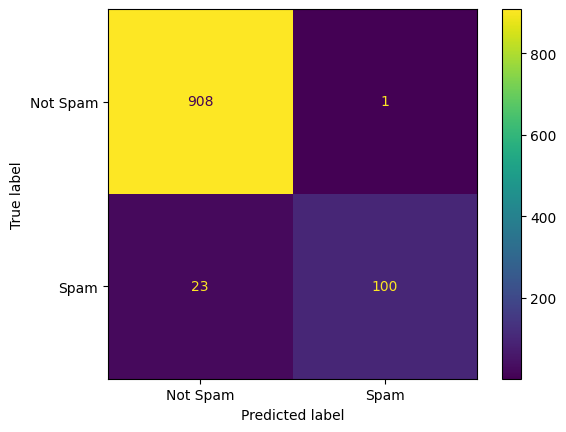

In [11]:
# Define a function to print performance metrics and plot confusion matrix
def perform(y_true, y_pred):
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Accuracy Score:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred), display_labels=['Not Spam', 'Spam'])
    cm_display.plot()
    plt.show()

# Call the function with the test predictions
perform(y_test, y_predict_test)